In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer


In [2]:
# Load the dataset
df = pd.read_csv('~/Desktop/MoodyCrypto/MoodyCrypto/data/raw/cryptonews.csv')

# Display the first few rows of the DataFrame
print(df.head())


                  date                                          sentiment  \
0  2023-12-19 06:40:41  {'class': 'negative', 'polarity': -0.1, 'subje...   
1  2023-12-19 06:03:24  {'class': 'neutral', 'polarity': 0.0, 'subject...   
2  2023-12-19 05:55:14  {'class': 'positive', 'polarity': 0.05, 'subje...   
3  2023-12-19 05:35:26  {'class': 'positive', 'polarity': 0.5, 'subjec...   
4  2023-12-19 05:31:08  {'class': 'neutral', 'polarity': 0.0, 'subject...   

          source     subject  \
0     CryptoNews     altcoin   
1     CryptoNews  blockchain   
2     CryptoNews  blockchain   
3  CoinTelegraph  blockchain   
4  CoinTelegraph    ethereum   

                                                text  \
0  Grayscale CEO Michael Sonnenshein believes the...   
1  In an exclusive interview with CryptoNews, Man...   
2  According to the Federal Court ruling on Decem...   
3  Some suggest EVM inscriptions are the latest w...   
4  A decision by bloXroute Labs to start censorin...   

       

In [3]:
#df = df.drop(columns=['sentiment'])


### Get sentiment scores for both text and title using VADER

In [4]:
# Initialize the VADER sentiment analyzer
analyzer = SentimentIntensityAnalyzer()


In [5]:
def get_sentiment_scores(text):
    if pd.isna(text):
        return {'neg': None, 'neu': None, 'pos': None, 'compound': None}
    return analyzer.polarity_scores(text)


In [6]:
# Apply sentiment analysis to the 'title' column
df['title_sentiment'] = df['title'].apply(get_sentiment_scores)

# Extract compound scores for easier analysis
df['title_compound'] = df['title_sentiment'].apply(lambda x: x['compound'])

# Apply sentiment analysis to the 'text' column
df['text_sentiment'] = df['text'].apply(get_sentiment_scores)

# Extract compound scores for easier analysis
df['text_compound'] = df['text_sentiment'].apply(lambda x: x['compound'])

# Fill missing compound scores with 0
df['title_compound'].fillna(0, inplace=True)
df['text_compound'].fillna(0, inplace=True)

df = df.drop(columns=['title_sentiment','text_sentiment'])
df.head()


C:\Users\Qiang Gao\AppData\Local\Temp\ipykernel_18596\1184241486.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['title_compound'].fillna(0, inplace=True)
C:\Users\Qiang Gao\AppData\Local\Temp\ipykernel_18596\1184241486.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

F

,date,sentiment,source,subject,text,title,url,title_compound,text_compound
0,2023-12-19 06:40:41,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,Grayscale CEO Michael Sonnenshein believes the...,Grayscale CEO Calls for Simultaneous Approval ...,https://cryptonews.comhttps://cryptonews.com/n...,0.4767,0.0000
1,2023-12-19 06:03:24,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CryptoNews,blockchain,"In an exclusive interview with CryptoNews, Man...",Indian Government is Actively Collaborating Wi...,https://cryptonews.comhttps://cryptonews.com/n...,0.3182,0.4019
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,0.4019,-0.2023
3,2023-12-19 05:35:26,"{'class': 'positive', 'polarity': 0.5, 'subjec...",CoinTelegraph,blockchain,Some suggest EVM inscriptions are the latest w...,Why a gold rush for inscriptions has broken ha...,https://cointelegraph.com/news/inscriptions-ev...,-0.4767,-0.1280
4,2023-12-19 05:31:08,"{'class': 'neutral', 'polarity': 0.0, 'subject...",CoinTelegraph,ethereum,A decision by bloXroute Labs to start censorin...,‘Concerning precedent’ — bloXroute Labs' MEV r...,https://cointelegraph.com/news/concerning-prec...,-0.5574,-0.4939


### Visualize their scores and compare

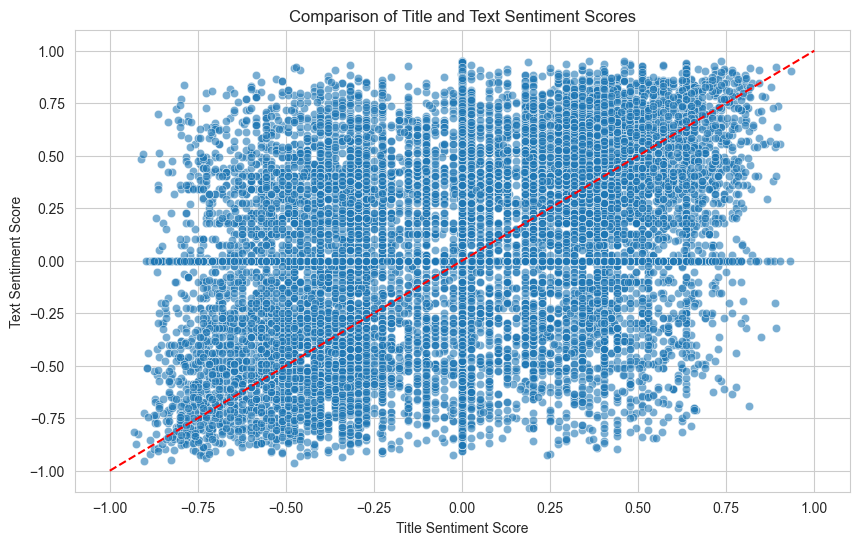

In [7]:
# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Create a scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='title_compound', y='text_compound', alpha=0.6)

# Add a reference line for perfect correlation
plt.plot([-1, 1], [-1, 1], color='red', linestyle='--')

# Set plot labels and title
plt.xlabel('Title Sentiment Score')
plt.ylabel('Text Sentiment Score')
plt.title('Comparison of Title and Text Sentiment Scores')

# Show the plot
plt.show()


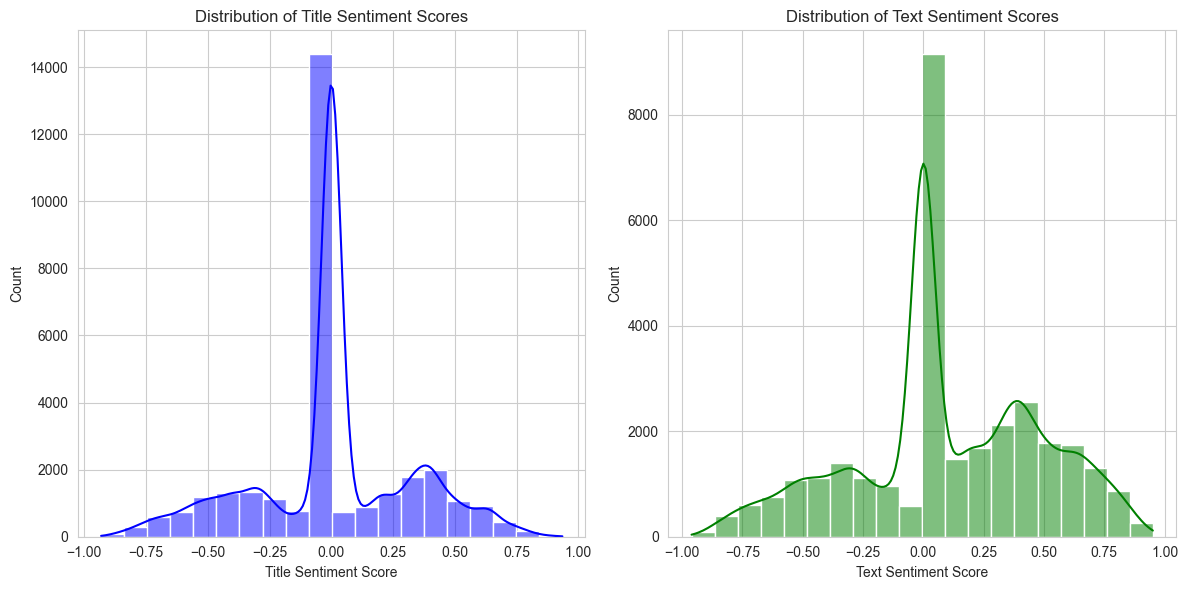

In [8]:
# Create subplots for title and text sentiment distributions
plt.figure(figsize=(12, 6))

# Title Sentiment Distribution
plt.subplot(1, 2, 1)
sns.histplot(df['title_compound'], bins=20, kde=True, color='blue')
plt.xlabel('Title Sentiment Score')
plt.title('Distribution of Title Sentiment Scores')

# Text Sentiment Distribution
plt.subplot(1, 2, 2)
sns.histplot(df['text_compound'], bins=20, kde=True, color='green')
plt.xlabel('Text Sentiment Score')
plt.title('Distribution of Text Sentiment Scores')

# Adjust layout
plt.tight_layout()
plt.show()


In [9]:
df['date'] = pd.to_datetime(df['date'], errors='coerce')

# Calculate missing dates count
missing_dates_count = df['date'].isna().sum()

# Calculate total entries
total_entries = len(df['date'])

# Compute the ratio of missing dates
missing_ratio = missing_dates_count / total_entries

# Display the results
print(f"Number of missing dates: {missing_dates_count}")
print(f"Total number of entries: {total_entries}")
print(f"Ratio of incorrectly formatted dates: {missing_ratio:.2%}")

Number of missing dates: 2
Total number of entries: 31037
Ratio of incorrectly formatted dates: 0.01%


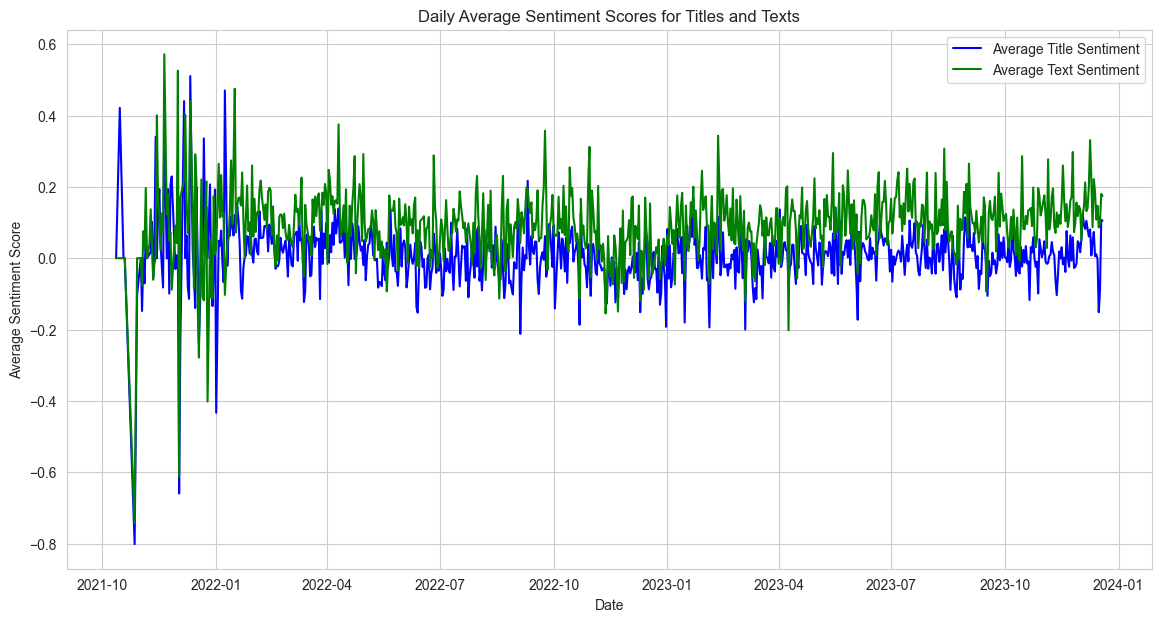

In [10]:
df.dropna(subset=['date'], inplace=True)

# Aggregate average sentiment scores by date
daily_sentiment = df.groupby(df['date'].dt.date).agg({'title_compound': 'mean', 'text_compound': 'mean'}).reset_index()

# Plotting
plt.figure(figsize=(14, 7))
plt.plot(daily_sentiment['date'], daily_sentiment['title_compound'], label='Average Title Sentiment', color='blue')
plt.plot(daily_sentiment['date'], daily_sentiment['text_compound'], label='Average Text Sentiment', color='green')

# Set labels and title
plt.xlabel('Date')
plt.ylabel('Average Sentiment Score')
plt.title('Daily Average Sentiment Scores for Titles and Texts')
plt.legend()

# Show the plot
plt.show()


### Explore the data whose text sentiment is opposite to title sentiment

In [11]:
df['text_title_opposite'] = df.apply(lambda row: row['title_compound'] * row['text_compound'] < 0, axis = 1)
opposite_count = df['text_title_opposite'].sum()
total_count = len(df)
opposite_ratio = opposite_count / total_count

print(f"Number of articles with opposite sentiments: {opposite_count}")
print(f"Total number of articles: {total_count}")
print(f"Ratio of opposite sentiments: {opposite_ratio:.2%}")

Number of articles with opposite sentiments: 3961
Total number of articles: 31035
Ratio of opposite sentiments: 12.76%


In [12]:
oppo_df = df[df['text_title_opposite']] 
oppo_df.head()

,date,sentiment,source,subject,text,title,url,title_compound,text_compound,text_title_opposite
2,2023-12-19 05:55:14,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoNews,blockchain,According to the Federal Court ruling on Decem...,Judge Approves Settlement: Binance to Pay $1.5...,https://cryptonews.comhttps://cryptonews.com/n...,0.4019,-0.2023,True
25,2023-12-18 18:04:55,"{'class': 'negative', 'polarity': -0.2, 'subje...",CryptoNews,blockchain,Arweave founder Sam Williams has taken to X to...,Arweave Founder Accuses Irys of Planning to Fo...,https://cryptonews.comhttps://cryptonews.com/n...,-0.3400,0.3182,True
31,2023-12-18 17:16:38,"{'class': 'positive', 'polarity': 0.1, 'subjec...",CryptoNews,blockchain,Ethereum layer-2 network Arbitrum (ARB) reache...,Arbitrum Transactions Reach New All-Time High ...,https://cryptonews.comhttps://cryptonews.com/n...,-0.2960,0.1027,True
32,2023-12-18 17:01:00,"{'class': 'positive', 'polarity': 0.05, 'subje...",CryptoPotato,bitcoin,"CoinShares said the ""mixed regional flows"" are...",Bitcoin Ends 11-Week Winning Streak With $33M ...,https://cryptopotato.com/bitcoin-ends-11-week-...,0.5267,-0.2960,True
35,2023-12-18 16:36:11,"{'class': 'negative', 'polarity': -0.1, 'subje...",CryptoNews,altcoin,A former Amazon engineer has pleaded guilty to...,Ex-Amazon Engineer Guilty of Historic $12.3M C...,https://cryptonews.comhttps://cryptonews.com/n...,-0.4215,0.1531,True


C:\Users\Qiang Gao\AppData\Local\Temp\ipykernel_18596\3294719847.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  oppo_df.dropna(subset=['date'], inplace=True)


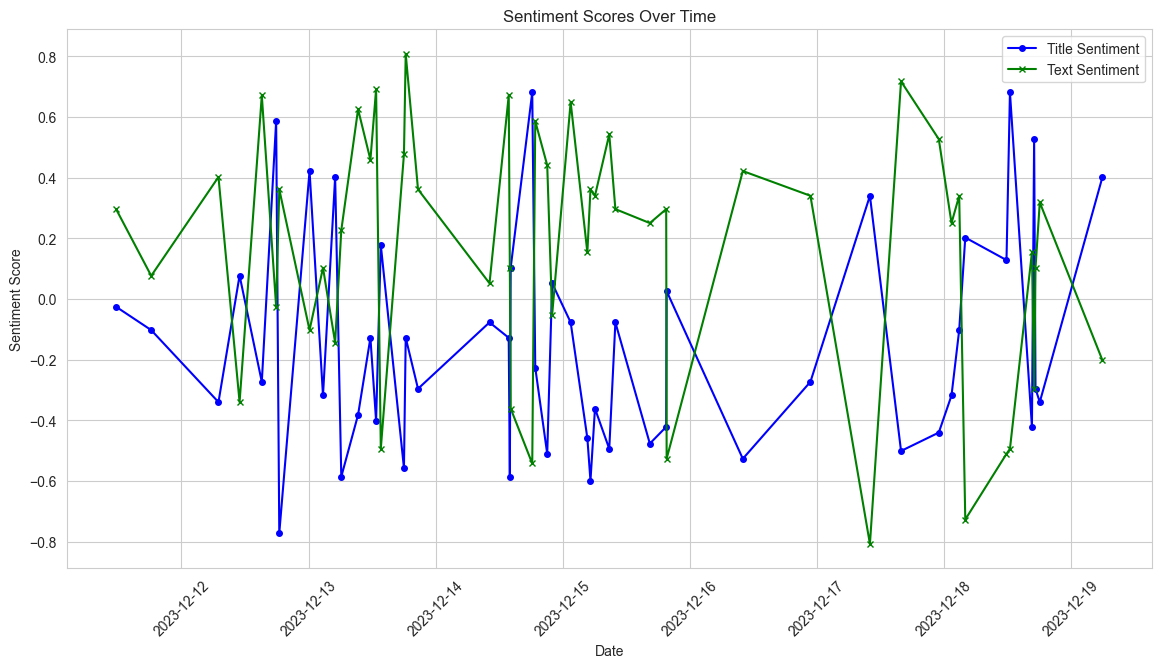

In [13]:
oppo_df.dropna(subset=['date'], inplace=True)
partial_oppo_df = oppo_df.head(50)
# Plotting
fig, ax = plt.subplots(figsize=(14, 7))
ax.plot(partial_oppo_df['date'], partial_oppo_df['title_compound'], label='Title Sentiment', color='blue', marker='o', linestyle='-', markersize=4)
ax.plot(partial_oppo_df['date'], partial_oppo_df['text_compound'], label='Text Sentiment', color='green', marker='x', linestyle='-', markersize=4)

# Labels and Title
ax.set_xlabel('Date')
ax.set_ylabel('Sentiment Score')
ax.set_title('Sentiment Scores Over Time')
ax.legend()

# Rotate date labels for better readability
plt.xticks(rotation=45)

plt.show()

Since text sentiment and title sentiment are quite different, I'll go for text sentiment.

In [14]:
df = df.drop(columns=['title_compound', 'text_title_opposite'])
